In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
COORDINATES = ["chrom", "pos", "ref", "alt"]

subset_filter = "non_coding"

dataset_renaming = {
    "mendelian_matched_9": "Mendelian traits",
    "gwas_matched_9": "Complex traits",
}

dataset = "mendelian_matched_9"
#dataset = "gwas_matched_9"
base_dir = f"../../results/dataset/{dataset}"
V = pd.read_parquet(f"{base_dir}/test.parquet").query("label")
V = V.merge(
    pd.read_parquet(f"{base_dir}/subset/{subset_filter}.parquet"),
    how="inner", on=COORDINATES
)
V

,chrom,pos,ref,alt,consequence,source,OMIM,label,tss_dist,match_group
0,1,7961859,C,G,PLS,OMIM,MIM 606324,True,34,PLS_0
1,1,9943502,A,T,5_prime_UTR_variant,OMIM,MIM 608553,True,26,5_prime_UTR_variant_0
2,1,9943503,C,T,5_prime_UTR_variant,OMIM,MIM 608553,True,27,5_prime_UTR_variant_1
3,1,11023351,G,A,3_prime_UTR_variant,OMIM,MIM 612069,True,1206,3_prime_UTR_variant_0
4,1,21509427,C,T,5_prime_UTR_variant,OMIM,MIM 241500,True,0,5_prime_UTR_variant_2
...,...,...,...,...,...,...,...,...,...,...
339,X,155022770,A,G,PLS,OMIM,MIM 306700,True,46,PLS_58
340,X,155022771,G,A,PLS,OMIM,MIM 306700,True,47,PLS_59
341,X,155022773,A,T,PLS,OMIM,MIM 306700,True,49,PLS_60
342,X,155022807,T,C,PLS,OMIM,MIM 306700,True,83,PLS_61


In [7]:
V.OMIM.nunique()

114

In [8]:
consequences = {
    "nonexonic_AND_distal": "Non-exonic-distal",
    "nonexonic_AND_proximal": "Non-exonic-proximal",
    "5_prime_UTR_variant": "5' UTR",
    "3_prime_UTR_variant": "3' UTR",
    "non_coding_transcript_exon_variant": "ncRNA",
}

V["consequence"] = "Other"

for consequence, label in consequences.items():
    if "mask" in V.columns: V = V.drop(columns="mask")
    df = pd.read_parquet(f"{base_dir}/subset/{consequence}.parquet")
    df["mask"] = True
    V = V.merge(df, how="left", on=COORDINATES).fillna(False)
    V.loc[V["mask"], "consequence"] = label

V["consequence"].value_counts()

consequence
5' UTR                 114
Non-exonic-proximal     90
ncRNA                   71
Non-exonic-distal       34
3' UTR                  29
Other                    6
Name: count, dtype: int64

In [9]:
cs = list(consequences.values()) + ["Other"]
cs

['Non-exonic-distal',
 'Non-exonic-proximal',
 "5' UTR",
 "3' UTR",
 'ncRNA',
 'Other']

In [10]:
df = V["consequence"].value_counts()
palette = sns.color_palette('Set2')
palette = [palette[cs.index(c)] for c in df.index]
palette

[(0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (1.0, 0.8509803921568627, 0.1843137254901961)]

In [11]:
df.index = df.index + " (" + df.astype(str) + ")"
df

5' UTR (114)                114
Non-exonic-proximal (90)     90
ncRNA (71)                   71
Non-exonic-distal (34)       34
3' UTR (29)                  29
Other (6)                     6
Name: count, dtype: int64

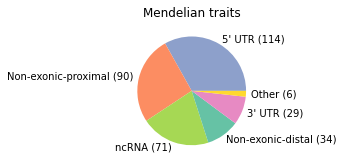

In [12]:
df.plot.pie(colors=palette, figsize=(2.5,2.5))
plt.ylabel("")
plt.title(dataset_renaming[dataset]);
plt.savefig(f"../../results/plots/consequence_distribution_{dataset}.svg", bbox_inches="tight")